# A Gentle Introduction to Spark

Now that our history lesson on Apache Spark is completed, it’s time to begin using and applying
it! This chapter presents a gentle introduction to Spark, in which we will walk through the core
architecture of a cluster, Spark Application, and Spark’s structured APIs using DataFrames and
SQL. Along the way we will touch on Spark’s core terminology and concepts so that you can
begin using Spark right away. Let’s get started with some basic background information.

## Spark’s Basic Architecture
Typically, when you think of a “computer,” you think about one machine sitting on your desk at
home or at work. This machine works perfectly well for watching movies or working with
spreadsheet software. However, as many users likely experience at some point, there are some
things that your computer is not powerful enough to perform. One particularly challenging area
is data processing. Single machines do not have enough power and resources to perform
computations on huge amounts of information (or the user probably does not have the time to
wait for the computation to finish). A cluster, or group, of computers, pools the resources of
many machines together, giving us the ability to use all the cumulative resources as if they were
a single computer. Now, a group of machines alone is not powerful, you need a framework to
coordinate work across them. Spark does just that, managing and coordinating the execution of
tasks on data across a cluster of computers.

The cluster of machines that Spark will use to execute tasks is managed by a cluster manager like
Spark’s standalone cluster manager, YARN, or Mesos. We then submit Spark Applications to
these cluster managers, which will grant resources to our application so that we can complete our
work.
### Spark Applications
Spark Applications consist of a driver process and a set of executor processes. The driver process
runs your main() function, sits on a node in the cluster, and is responsible for three things:
maintaining information about the Spark Application; responding to a user’s program or input;
and analyzing, distributing, and scheduling work across the executors (discussed momentarily).
The driver process is absolutely essential—it’s the heart of a Spark Application and maintains all
relevant information during the lifetime of the application.

The executors are responsible for actually carrying out the work that the driver assigns them.
This means that each executor is responsible for only two things: executing code assigned to it
by the driver, and reporting the state of the computation on that executor back to the driver node.

Figure 2-1 demonstrates how the cluster manager controls physical machines and allocates
resources to Spark Applications. This can be one of three core cluster managers: Spark’s
standalone cluster manager, YARN, or Mesos. This means that there can be multiple Spark
Applications running on a cluster at the same time. We will discuss cluster managers more in Part IV.
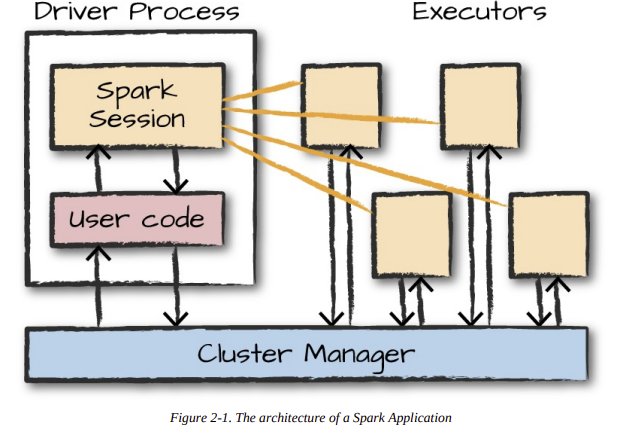
In Figure 2-1, we can see the driver on the left and four executors on the right. In this diagram,
we removed the concept of cluster nodes. The user can specify how many executors should fall
on each node through configurations.

___NOTE___

Spark, in addition to its cluster mode, also has a local mode. The driver and executors are simply
processes, which means that they can live on the same machine or different machines. In local mode,
the driver and executurs run (as threads) on your individual computer instead of a cluster. We wrote
this book with local mode in mind, so you should be able to run everything on a single machine.

Here are the key points to understand about Spark Applications at this point:
* Spark employs a cluster manager that keeps track of the resources available.
* The driver process is responsible for executing the driver program’s commands across
the executors to complete a given task.

The executors, for the most part, will always be running Spark code. However, the driver can be
“driven” from a number of different languages through Spark’s language APIs. Let’s take a look
at those in the next section.

## Spark’s Language APIs
Spark’s language APIs make it possible for you to run Spark code using various programming
languages. For the most part, Spark presents some core “concepts” in every language; these
concepts are then translated into Spark code that runs on the cluster of machines. If you use just
the Structured APIs, you can expect all languages to have similar performance characteristics.
Here’s a brief rundown:

___Scala___

Spark is primarily written in Scala, making it Spark’s “default” language. This book will
include Scala code examples wherever relevant.

___Java___

Even though Spark is written in Scala, Spark’s authors have been careful to ensure that you
can write Spark code in Java. This book will focus primarily on Scala but will provide Java
examples where relevant.

___Python___

Python supports nearly all constructs that Scala supports. This book will include Python code
examples whenever we include Scala code examples and a Python API exists.

___SQL___

Spark supports a subset of the ANSI SQL 2003 standard. This makes it easy for analysts and
non-programmers to take advantage of the big data powers of Spark. This book includes SQL
code examples wherever relevant.

___R___

Spark has two commonly used R libraries: one as a part of Spark core (SparkR) and another
as an R community-driven package (sparklyr). We cover both of these integrations in
Chapter 32.

Figure 2-2 presents a simple illustration of this relationship.
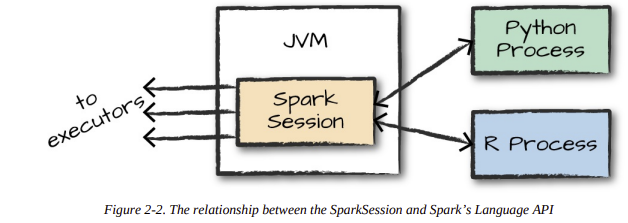
Each language API maintains the same core concepts that we described earlier. There is a
SparkSession object available to the user, which is the entrance point to running Spark code.
When using Spark from Python or R, you don’t write explicit JVM instructions; instead, you
write Python and R code that Spark translates into code that it then can run on the executor
JVMs.

## Spark’s APIs
Although you can drive Spark from a variety of languages, what it makes available in those
languages is worth mentioning. Spark has two fundamental sets of APIs: the low-level
“unstructured” APIs, and the higher-level structured APIs. We discuss both in this book, but
these introductory chapters will focus primarily on the higher-level structured APIs.

## Starting Spark
Thus far, we covered the basic concepts of Spark Applications. This has all been conceptual in
nature. When we actually go about writing our Spark Application, we are going to need a way to
send user commands and data to it. We do that by first creating a SparkSession.

___Note___

To do this, we will start Spark’s local mode, just like we did in Chapter 1. This means running
./bin/spark-shell to access the Scala console to start an interactive session. You can also start the
Python console by using ./bin/pyspark. This starts an interactive Spark Application. There is also a
process for submitting standalone applications to Spark called spark-submit, whereby you can
submit a precompiled application to Spark. We’ll show you how to do that in Chapter 3.

When you start Spark in this interactive mode, you implicitly create a SparkSession that manages
the Spark Application. When you start it through a standalone application, you must create the
SparkSession object yourself in your application code.

## The SparkSession
As discussed in the beginning of this chapter, you control your Spark Application through a
driver process called the SparkSession. The SparkSession instance is the way Spark executes
user-defined manipulations across the cluster. There is a one-to-one correspondence between a
SparkSession and a Spark Application. In Scala and Python, the variable is available as spark
when you start the console. Let’s go ahead and look at the SparkSession in both Scala and/or
Python:

spark

In Scala, you should see something like the following:

res0: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@...

In Python you’ll see something like this:

<pyspark.sql.session.SparkSession at 0x7efda4c1ccd0>

Let’s now perform the simple task of creating a range of numbers. This range of numbers is just
like a named column in a spreadsheet:
~~~
// in Scala
val myRange = spark.range(1000).toDF("number")
# in Python
myRange = spark.range(1000).toDF("number")
~~~
You just ran your first Spark code! We created a DataFrame with one column containing 1,000
rows with values from 0 to 999. This range of numbers represents a distributed collection. When
run on a cluster, each part of this range of numbers exists on a different executor. This is a Spark
DataFrame.

## DataFrames
A DataFrame is the most common Structured API and simply represents a table of data with
rows and columns. The list that defines the columns and the types within those columns is called
the schema. You can think of a DataFrame as a spreadsheet with named columns. Figure 2-3
illustrates the fundamental difference: a spreadsheet sits on one computer in one specific
location, whereas a Spark DataFrame can span thousands of computers. The reason for putting
the data on more than one computer should be intuitive: either the data is too large to fit on one
machine or it would simply take too long to perform that computation on one machine.
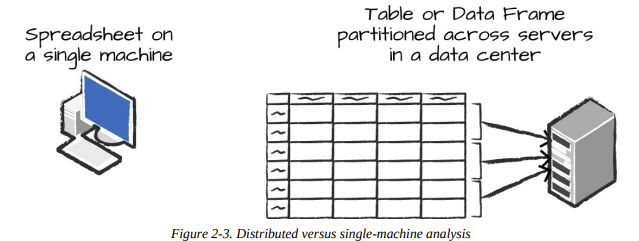
The DataFrame concept is not unique to Spark. R and Python both have similar concepts.
However, Python/R DataFrames (with some exceptions) exist on one machine rather than
multiple machines. This limits what you can do with a given DataFrame to the resources that
exist on that specific machine. However, because Spark has language interfaces for both Python
and R, it’s quite easy to convert Pandas (Python) DataFrames to Spark DataFrames, and R
DataFrames to Spark DataFrames.

___NOTE___

Spark has several core abstractions: Datasets, DataFrames, SQL Tables, and Resilient Distributed
Datasets (RDDs). These different abstractions all represent distributed collections of data. The easiest
and most efficient are DataFrames, which are available in all languages. We cover Datasets at the end
of Part II, and RDDs in Part III.

### Partitions
To allow every executor to perform work in parallel, Spark breaks up the data into chunks called
partitions. A partition is a collection of rows that sit on one physical machine in your cluster. A
DataFrame’s partitions represent how the data is physically distributed across the cluster of
machines during execution. If you have one partition, Spark will have a parallelism of only one,
even if you have thousands of executors. If you have many partitions but only one executor,
Spark will still have a parallelism of only one because there is only one computation resource.

An important thing to note is that with DataFrames you do not (for the most part) manipulate
partitions manually or individually. You simply specify high-level transformations of data in the
physical partitions, and Spark determines how this work will actually execute on the cluster.
Lower-level APIs do exist (via the RDD interface), and we cover those in Part III.

## Transformations
In Spark, the core data structures are immutable, meaning they cannot be changed after they’re
created. This might seem like a strange concept at first: if you cannot change it, how are you
supposed to use it? To “change” a DataFrame, you need to instruct Spark how you would like to
modify it to do what you want. These instructions are called transformations. Let’s perform a
simple transformation to find all even numbers in our current DataFrame:
~~~
// in Scala
val divisBy2 = myRange.where("number % 2 = 0")
# in Python
divisBy2 = myRange.where("number % 2 = 0")
~~~
Notice that these return no output. This is because we specified only an abstract transformation,
and Spark will not act on transformations until we call an action (we discuss this shortly).
Transformations are the core of how you express your business logic using Spark. There are two
types of transformations: those that specify narrow dependencies, and those that specify wide
dependencies.

Transformations consisting of narrow dependencies (we’ll call them narrow transformations) are
those for which each input partition will contribute to only one output partition. In the preceding
code snippet, the where statement specifies a narrow dependency, where only one partition
contributes to at most one output partition, as you can see in Figure 2-4.
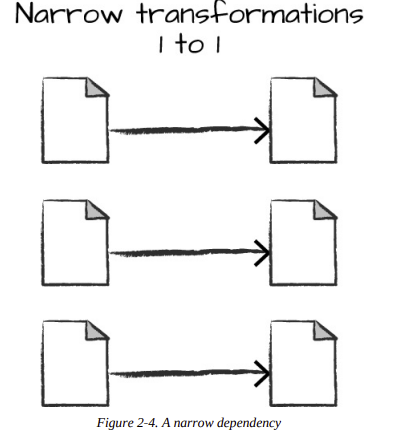
A wide dependency (or wide transformation) style transformation will have input partitions
contributing to many output partitions. You will often hear this referred to as a shuffle whereby
Spark will exchange partitions across the cluster. With narrow transformations, Spark will
automatically perform an operation called pipelining, meaning that if we specify multiple filters
on DataFrames, they’ll all be performed in-memory. The same cannot be said for shuffles. When
we perform a shuffle, Spark writes the results to disk. Wide transformations are illustrated in
Figure 2-5
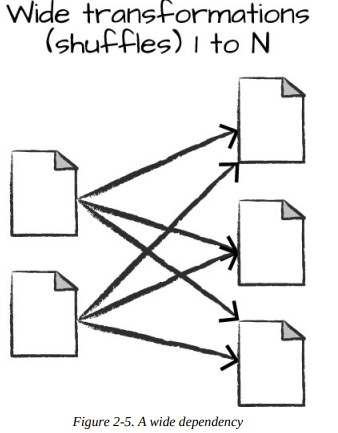
You’ll see a lot of discussion about shuffle optimization across the web because it’s an important
topic, but for now, all you need to understand is that there are two kinds of transformations. You
now can see how transformations are simply ways of specifying different series of data
manipulation. This leads us to a topic called lazy evaluation.

#### Lazy Evaluation
Lazy evaulation means that Spark will wait until the very last moment to execute the graph of
computation instructions. In Spark, instead of modifying the data immediately when you express
some operation, you build up a plan of transformations that you would like to apply to your
source data. By waiting until the last minute to execute the code, Spark compiles this plan from
your raw DataFrame transformations to a streamlined physical plan that will run as efficiently as
possible across the cluster. This provides immense benefits because Spark can optimize the
entire data flow from end to end. An example of this is something called predicate pushdown on
DataFrames. If we build a large Spark job but specify a filter at the end that only requires us to
fetch one row from our source data, the most efficient way to execute this is to access the single
record that we need. Spark will actually optimize this for us by pushing the filter down
automatically.

## Actions
Transformations allow us to build up our logical transformation plan. To trigger the computation,
we run an action. An action instructs Spark to compute a result from a series of transformations.
The simplest action is count, which gives us the total number of records in the DataFrame:

divisBy2.count()

The output of the preceding code should be 500. Of course, count is not the only action. There
are three kinds of actions:
* Actions to view data in the console
* Actions to collect data to native objects in the respective language
* Actions to write to output data sources

In specifying this action, we started a Spark job that runs our filter transformation (a narrow
transformation), then an aggregation (a wide transformation) that performs the counts on a per
partition basis, and then a collect, which brings our result to a native object in the respective
language. You can see all of this by inspecting the Spark UI, a tool included in Spark with which
you can monitor the Spark jobs running on a cluster.

## Spark UI
You can monitor the progress of a job through the Spark web UI. The Spark UI is available on
port 4040 of the driver node. If you are running in local mode, this will be http://localhost:4040.
The Spark UI displays information on the state of your Spark jobs, its environment, and cluster
state. It’s very useful, especially for tuning and debugging. Figure 2-6 shows an example UI for a
Spark job where two stages containing nine tasks were executed.
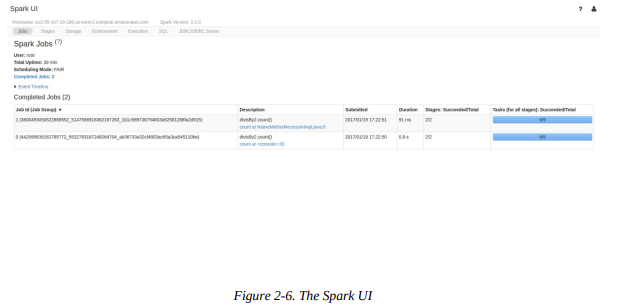
This chapter will not go into detail about Spark job execution and the Spark UI. We will cover
that in Chapter 18. At this point, all you need to understand is that a Spark job represents a set of
transformations triggered by an individual action, and you can monitor that job from the Spark
UI.

## An End-to-End Example
In the previous example, we created a DataFrame of a range of numbers; not exactly
groundbreaking big data. In this section, we will reinforce everything we learned previously in
this chapter with a more realistic example, and explain step by step what is happening under the
hood. We’ll use Spark to analyze some flight data from the United States Bureau of
Transportation statistics.

Inside of the CSV folder, you’ll see that we have a number of files. There’s also a number of
other folders with different file formats, which we discuss in Chapter 9. For now, let’s focus on
the CSV files.

Each file has a number of rows within it. These files are CSV files, meaning that they’re a semistructured data format, with each row in the file representing a row in our future DataFrame:
~~~
$ head /data/flight-data/csv/2015-summary.csv
DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,count
United States,Romania,15
United States,Croatia,1
United States,Ireland,344
~~~
Spark includes the ability to read and write from a large number of data sources. To read this
data, we will use a DataFrameReader that is associated with our SparkSession. In doing so, we
will specify the file format as well as any options we want to specify. In our case, we want to do
something called schema inference, which means that we want Spark to take a best guess at what
the schema of our DataFrame should be. We also want to specify that the first row is the header
in the file, so we’ll specify that as an option, too.
To get the schema information, Spark reads in a little bit of the data and then attempts to parse
the types in those rows according to the types available in Spark. You also have the option of
strictly specifying a schema when you read in data (which we recommend in production
scenarios):
~~~
// in Scala
val flightData2015 = spark
.read
.option("inferSchema", "true")
.option("header", "true")
.csv("/data/flight-data/csv/2015-summary.csv")
# in Python
flightData2015 = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv("/data/flight-data/csv/2015-summary.csv")
~~~
Each of these DataFrames (in Scala and Python) have a set of columns with an unspecified
number of rows. The reason the number of rows is unspecified is because reading data is a
transformation, and is therefore a lazy operation. Spark peeked at only a couple of rows of data
to try to guess what types each column should be. Figure 2-7 provides an illustration of the CSV
file being read into a DataFrame and then being converted into a local array or list of rows.
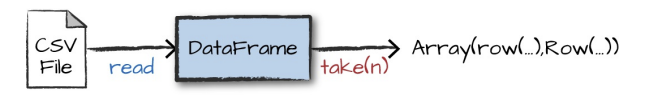
Figure 2-7. Reading a CSV file into a DataFrame and converting it to a local array or list of rows
If we perform the take action on the DataFrame, we will be able to see the same results that we
saw before when we used the command line:
~~~
flightData2015.take(3)
Array([United States,Romania,15], [United States,Croatia...
~~~
Let’s specify some more transformations! Now, let’s sort our data according to the count
column, which is an integer type. Figure 2-8 illustrates this process.

___NOTE___

Remember, sort does not modify the DataFrame. We use sort as a transformation that returns a new
DataFrame by transforming the previous DataFrame. Let’s illustrate what’s happening when we call
take on that resulting DataFrame (Figure 2-8).
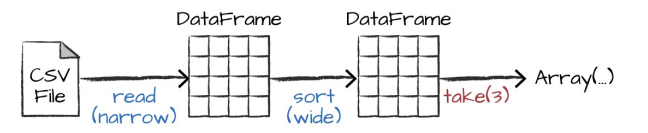
Nothing happens to the data when we call sort because it’s just a transformation. However, we
can see that Spark is building up a plan for how it will execute this across the cluster by looking
at the explain plan. We can call explain on any DataFrame object to see the DataFrame’s
lineage (or how Spark will execute this query):
~~~
flightData2015.sort("count").explain()
== Physical Plan ==
*Sort [count#195 ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(count#195 ASC NULLS FIRST, 200)
+- *FileScan csv [DEST_COUNTRY_NAME#193,ORIGIN_COUNTRY_NAME#194,count#195] ...
~~~
Congratulations, you’ve just read your first explain plan! Explain plans are a bit arcane, but with
a bit of practice it becomes second nature. You can read explain plans from top to bottom, the
top being the end result, and the bottom being the source(s) of data. In this case, take a look at
the first keywords. You will see sort, exchange, and FileScan. That’s because the sort of our data
is actually a wide transformation because rows will need to be compared with one another. Don’t
worry too much about understanding everything about explain plans at this point, they can just
be helpful tools for debugging and improving your knowledge as you progress with Spark.
Now, just like we did before, we can specify an action to kick off this plan. However, before
doing that, we’re going to set a configuration. By default, when we perform a shuffle, Spark
outputs 200 shuffle partitions. Let’s set this value to 5 to reduce the number of the output
partitions from the shuffle:
~~~
spark.conf.set("spark.sql.shuffle.partitions", "5")
flightData2015.sort("count").take(2)
... Array([United States,Singapore,1], [Moldova,United States,1])
~~~
Figure 2-9 illustrates this operation. Notice that in addition to the logical transformations, we
include the physical partition count, as well.
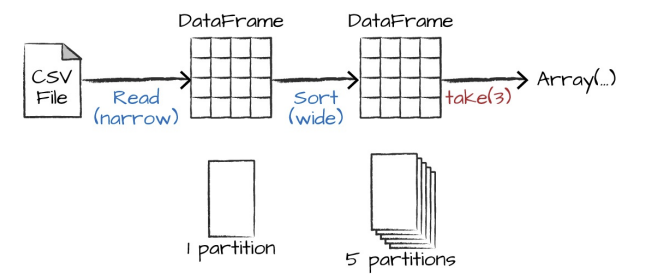
Figure 2-9. The process of logical and physical DataFrame manipulation

The logical plan of transformations that we build up defines a lineage for the DataFrame so that
at any given point in time, Spark knows how to recompute any partition by performing all of the
operations it had before on the same input data. This sits at the heart of Spark’s programming
model—functional programming where the same inputs always result in the same outputs when
the transformations on that data stay constant.

We do not manipulate the physical data; instead, we configure physical execution characteristics
through things like the shuffle partitions parameter that we set a few moments ago. We ended up
with five output partitions because that’s the value we specified in the shuffle partition. You can
change this to help control the physical execution characteristics of your Spark jobs. Go ahead
and experiment with different values and see the number of partitions yourself. In experimenting
with different values, you should see drastically different runtimes. Remember that you can
monitor the job progress by navigating to the Spark UI on port 4040 to see the physical and
logical execution characteristics of your jobs.

### DataFrames and SQL
We worked through a simple transformation in the previous example, let’s now work through a
more complex one and follow along in both DataFrames and SQL. Spark can run the same
transformations, regardless of the language, in the exact same way. You can express your
business logic in SQL or DataFrames (either in R, Python, Scala, or Java) and Spark will
compile that logic down to an underlying plan (that you can see in the explain plan) before
actually executing your code. With Spark SQL, you can register any DataFrame as a table or
view (a temporary table) and query it using pure SQL. There is no performance difference
between writing SQL queries or writing DataFrame code, they both “compile” to the same
underlying plan that we specify in DataFrame code.

You can make any DataFrame into a table or view with one simple method call:
~~~
flightData2015.createOrReplaceTempView("flight_data_2015")
~~~
Now we can query our data in SQL. To do so, we’ll use the spark.sql function (remember,
spark is our SparkSession variable) that conveniently returns a new DataFrame. Although this
might seem a bit circular in logic—that a SQL query against a DataFrame returns another
DataFrame—it’s actually quite powerful. This makes it possible for you to specify
transformations in the manner most convenient to you at any given point in time and not sacrifice
any efficiency to do so! To understand that this is happening, let’s take a look at two explain
plans:
~~~
// in Scala
val sqlWay = spark.sql("""
SELECT DEST_COUNTRY_NAME, count(1)
FROM flight_data_2015
GROUP BY DEST_COUNTRY_NAME
""")
val dataFrameWay = flightData2015
.groupBy('DEST_COUNTRY_NAME)
.count()
sqlWay.explain
dataFrameWay.explain
# in Python
sqlWay = spark.sql("""
SELECT DEST_COUNTRY_NAME, count(1)
FROM flight_data_2015
GROUP BY DEST_COUNTRY_NAME
""")
dataFrameWay = flightData2015\
.groupBy("DEST_COUNTRY_NAME")\
.count()
sqlWay.explain()
dataFrameWay.explain()
== Physical Plan ==
*HashAggregate(keys=[DEST_COUNTRY_NAME#182], functions=[count(1)])
+- Exchange hashpartitioning(DEST_COUNTRY_NAME#182, 5)
+- *HashAggregate(keys=[DEST_COUNTRY_NAME#182], functions=[partial_count(1)])
+- *FileScan csv [DEST_COUNTRY_NAME#182] ...
== Physical Plan ==
*HashAggregate(keys=[DEST_COUNTRY_NAME#182], functions=[count(1)])
+- Exchange hashpartitioning(DEST_COUNTRY_NAME#182, 5)
+- *HashAggregate(keys=[DEST_COUNTRY_NAME#182], functions=[partial_count(1)])
+- *FileScan csv [DEST_COUNTRY_NAME#182] ...
~~~
Notice that these plans compile to the exact same underlying plan!

Let’s pull out some interesting statistics from our data. One thing to understand is that
DataFrames (and SQL) in Spark already have a huge number of manipulations available. There
are hundreds of functions that you can use and import to help you resolve your big data problems
faster. We will use the max function, to establish the maximum number of flights to and from any
given location. This just scans each value in the relevant column in the DataFrame and checks
whether it’s greater than the previous values that have been seen. This is a transformation,
because we are effectively filtering down to one row. Let’s see what that looks like:
~~~
spark.sql("SELECT max(count) from flight_data_2015").take(1)
// in Scala
import org.apache.spark.sql.functions.max
flightData2015.select(max("count")).take(1)
# in Python
from pyspark.sql.functions import max
flightData2015.select(max("count")).take(1)
~~~
Great, that’s a simple example that gives a result of 370,002. Let’s perform something a bit more
complicated and find the top five destination countries in the data. This is our first multitransformation query, so we’ll take it step by step. Let’s begin with a fairly straightforward SQL
aggregation:
~~~
// in Scala
val maxSql = spark.sql("""
SELECT DEST_COUNTRY_NAME, sum(count) as destination_total
FROM flight_data_2015
GROUP BY DEST_COUNTRY_NAME
ORDER BY sum(count) DESC
LIMIT 5
""")
maxSql.show()
# in Python
maxSql = spark.sql("""
SELECT DEST_COUNTRY_NAME, sum(count) as destination_total
FROM flight_data_2015
GROUP BY DEST_COUNTRY_NAME
ORDER BY sum(count) DESC
LIMIT 5
""")
maxSql.show()
+-----------------+-----------------+
|DEST_COUNTRY_NAME|destination_total|
+-----------------+-----------------+
| United States| 411352|
| Canada| 8399|
| Mexico| 7140|
| United Kingdom| 2025|
| Japan| 1548|
+-----------------+-----------------+
~~~
Now, let’s move to the DataFrame syntax that is semantically similar but slightly different in
implementation and ordering. But, as we mentioned, the underlying plans for both of them are
the same. Let’s run the queries and see their results as a sanity check:
~~~
// in Scala
import org.apache.spark.sql.functions.desc
flightData2015
.groupBy("DEST_COUNTRY_NAME")
.sum("count")
.withColumnRenamed("sum(count)", "destination_total")
.sort(desc("destination_total"))
.limit(5)
.show()
# in Python
from pyspark.sql.functions import desc
flightData2015\
.groupBy("DEST_COUNTRY_NAME")\
.sum("count")\
.withColumnRenamed("sum(count)", "destination_total")\
.sort(desc("destination_total"))\
.limit(5)\
.show()
+-----------------+-----------------+
|DEST_COUNTRY_NAME|destination_total|
+-----------------+-----------------+
| United States| 411352|
| Canada| 8399|
| Mexico| 7140|
| United Kingdom| 2025|
| Japan| 1548|
+-----------------+-----------------+
~~~
Now there are seven steps that take us all the way back to the source data. You can see this in the
explain plan on those DataFrames. Figure 2-10 shows the set of steps that we perform in “code.”
The true execution plan (the one visible in explain) will differ from that shown in Figure 2-10
because of optimizations in the physical execution; however, the llustration is as good of a
starting point as any. This execution plan is a directed acyclic graph (DAG) of transformations,
each resulting in a new immutable DataFrame, on which we call an action to generate a result.
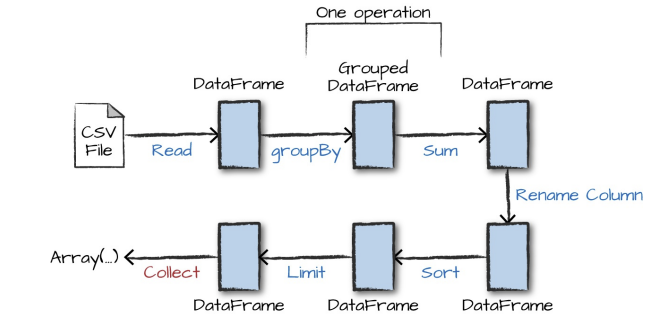
Figure 2-10. The entire DataFrame transformation flow

The first step is to read in the data. We defined the DataFrame previously but, as a reminder,
Spark does not actually read it in until an action is called on that DataFrame or one derived from
the original DataFrame.

The second step is our grouping; technically when we call groupBy, we end up with a
RelationalGroupedDataset, which is a fancy name for a DataFrame that has a grouping
specified but needs the user to specify an aggregation before it can be queried further. We
basically specified that we’re going to be grouping by a key (or set of keys) and that now we’re
going to perform an aggregation over each one of those keys.

Therefore, the third step is to specify the aggregation. Let’s use the sum aggregation method.
This takes as input a column expression or, simply, a column name. The result of the sum
method call is a new DataFrame. You’ll see that it has a new schema but that it does know the
type of each column. It’s important to reinforce (again!) that no computation has been
performed. This is simply another transformation that we’ve expressed, and Spark is simply able
to trace our type information through it.

The fourth step is a simple renaming. We use the withColumnRenamed method that takes two
arguments, the original column name and the new column name. Of course, this doesn’t perform
computation: this is just another transformation!

The fifth step sorts the data such that if we were to take results off of the top of the DataFrame,
they would have the largest values in the destination_total column.

You likely noticed that we had to import a function to do this, the desc function. You might also
have noticed that desc does not return a string but a Column. In general, many DataFrame
methods will accept strings (as column names) or Column types or expressions. Columns and
expressions are actually the exact same thing.

Penultimately, we’ll specify a limit. This just specifies that we only want to return the first five
values in our final DataFrame instead of all the data.

The last step is our action! Now we actually begin the process of collecting the results of our
DataFrame, and Spark will give us back a list or array in the language that we’re executing. To
reinforce all of this, let’s look at the explain plan for the previous query:
~~~
// in Scala
flightData2015
.groupBy("DEST_COUNTRY_NAME")
.sum("count")
.withColumnRenamed("sum(count)", "destination_total")
.sort(desc("destination_total"))
.limit(5)
.explain()
# in Python
flightData2015\
.groupBy("DEST_COUNTRY_NAME")\
.sum("count")\
.withColumnRenamed("sum(count)", "destination_total")\
.sort(desc("destination_total"))\
.limit(5)\
.explain()
== Physical Plan ==
TakeOrderedAndProject(limit=5, orderBy=[destination_total#16194L DESC], outpu...
+- *HashAggregate(keys=[DEST_COUNTRY_NAME#7323], functions=[sum(count#7325L)])
+- Exchange hashpartitioning(DEST_COUNTRY_NAME#7323, 5)
+- *HashAggregate(keys=[DEST_COUNTRY_NAME#7323], functions=[partial_sum...
+- InMemoryTableScan [DEST_COUNTRY_NAME#7323, count#7325L]
+- InMemoryRelation [DEST_COUNTRY_NAME#7323, ORIGIN_COUNTRY_NA...
+- *Scan csv [DEST_COUNTRY_NAME#7578,ORIGIN_COUNTRY_NAME...
~~~
Although this explain plan doesn’t match our exact “conceptual plan,” all of the pieces are there.
You can see the limit statement as well as the orderBy (in the first line). You can also see how
our aggregation happens in two phases, in the partial_sum calls. This is because summing a list
of numbers is commutative, and Spark can perform the sum, partition by partition. Of course we
can see how we read in the DataFrame, as well.

Naturally, we don’t always need to collect the data. We can also write it out to any data source
that Spark supports. For instance, suppose we want to store the information in a database like
PostgreSQL or write them out to another file.

## Conclusion
This chapter introduced the basics of Apache Spark. We talked about transformations and
actions, and how Spark lazily executes a DAG of transformations in order to optimize the
execution plan on DataFrames. We also discussed how data is organized into partitions and set
the stage for working with more complex transformations. In Chapter 3 we take you on a tour of
the vast Spark ecosystem and look at some more advanced concepts and tools that are available
in Spark, from streaming to machine learning.